In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../code/')
from utils import run_rc_sim, linear_scale_forward, get_dataset_psd


In [14]:
tstop = 80
dt = 0.5
t_vec = np.linspace(0, tstop, np.round(tstop/dt).astype(int))
pulse_flat = np.zeros(t_vec.shape[0])

i1_start = 30
pulse_width = 10

theta_ranges = [('amp1', (0, 1), linear_scale_forward),
                ('amp2', (-1, 0), linear_scale_forward), 
                ('pulse_diff', (-20, 20), linear_scale_forward)]

n_params = 3
prior_dict = {key: value for (key, value, _) in theta_ranges[:n_params]}
scale_func_list = [scale_func for (_, _, scale_func) in theta_ranges[:n_params]]

def sim_func(theta_sample):
    theta_dict = {param_name: scale_func_list[idx](theta_sample[idx], bounds) for 
                  idx, (param_name, bounds) in enumerate(prior_dict.items())}
    return run_rc_sim(theta_dict), theta_dict.values()

In [15]:
theta1 = np.array([0.6, 0.75, 0.6])
theta2 = np.array([0.6, 0.75, 0.4])
res1, _ = sim_func(theta1)
res2, _ = sim_func(theta2)

res = np.hstack([res1, res2]).T

upper = 0.1
noise = np.random.random(res.shape) * upper - (upper / 2)
res = res + noise

/home/ntolley/anaconda3/envs/hnn_binder/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 160, using nperseg = 160
  .format(nperseg, input_length))


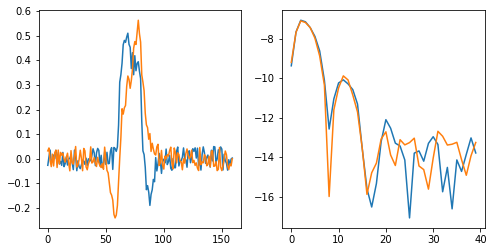

In [23]:
for _ in range(4):
    noise = np.random.random(res.shape) * upper - (upper / 2)
    res = res + noise

    dt = 0.5 # Sampling interval used for simulation
    fs = (1/dt) * 1e3
    dpl_spectra1 = get_dataset_psd(res, fs=fs)

    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    plt.plot(res.T)
    plt.subplot(1,2,2)
    _ = plt.plot(dpl_spectra1.T)

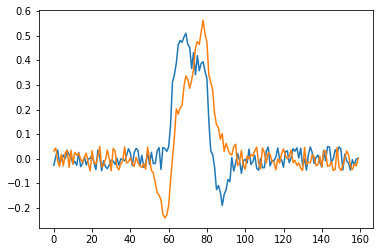

In [17]:
plt.plot(res.T)

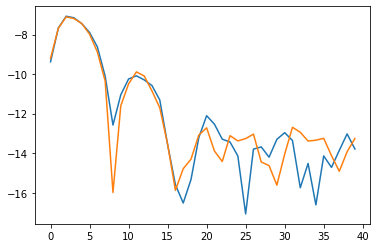